In [ ]:

%load_ext autoreload
%autoreload 2
import sys
import os

# Ajout du dossier src au path pour pouvoir importer nos modules
sys.path.append(os.path.abspath('../src'))

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

from models import MultiClassAdaline
from utils import plot_decision_regions

print("Imports réussis !")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Imports réussis !


In [ ]:

iris = datasets.load_iris()
# On ne garde que 2 features pour la visualisation (longueur/largeur pétale)
X = iris.data[:, [2, 3]]
y = iris.target

# Split Train/Test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# STANDARDISATION (Obligatoire pour la descente de gradient)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print(f"Données prêtes. Classes: {np.unique(y)}")

Données prêtes. Classes: [0 1 2]


Accuracy (Notre Adaline) : 68.89%


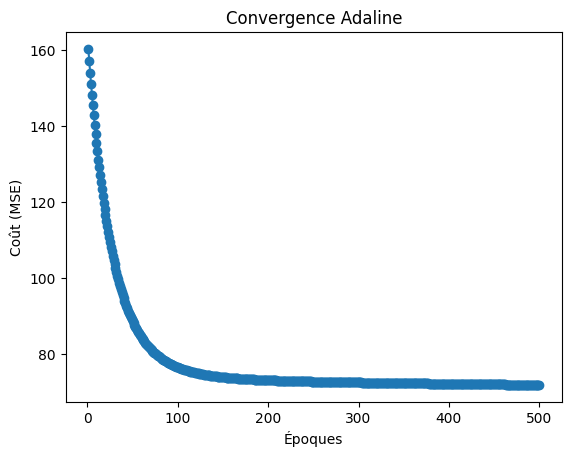

In [ ]:
# Entraînement de NOTRE Adaline Multi-classes
ada = MultiClassAdaline(eta=0.0001, n_iter=500, random_state=1)
ada.fit(X_train_std, y_train)

# Évaluation
y_pred = ada.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy (Notre Adaline) : {acc*100:.2f}%')

# Visualisation de la convergence (Coût)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Époques')
plt.ylabel('Coût (MSE)')
plt.title('Convergence Adaline')
plt.show()

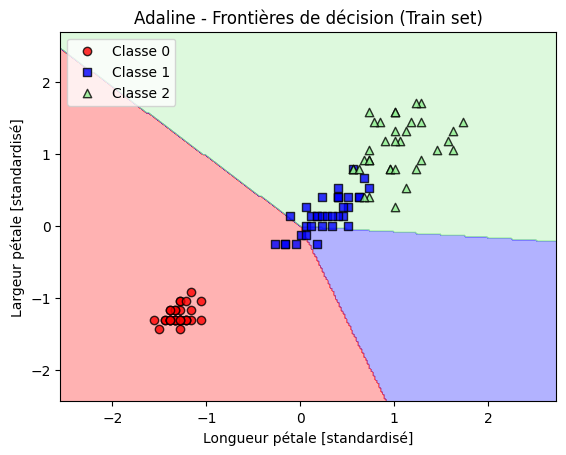

In [ ]:
#  Visualisation des frontières (Notre Modèle)
plot_decision_regions(X_train_std, y_train, classifier=ada)
plt.title('Adaline - Frontières de décision (Train set)')
plt.xlabel('Longueur pétale [standardisé]')
plt.ylabel('Largeur pétale [standardisé]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#  Comparaison avec Scikit-Learn
# SGDClassifier avec loss='squared_error' est l'équivalent le plus proche d'Adaline
skl_model = SGDClassifier(loss='squared_error', 
                          learning_rate='constant', eta0=0.001, 
                          max_iter=1000, random_state=1, tol=1e-3)
skl_model.fit(X_train_std, y_train)

y_pred_skl = skl_model.predict(X_test_std)
acc_skl = accuracy_score(y_test, y_pred_skl)

print(f"Accuracy Scikit-Learn : {acc_skl*100:.2f}%")
print(f"Différence : {acc - acc_skl:.2f}")

Accuracy Scikit-Learn : 66.67%
Différence : 0.02
